   ReceiverID    ActionType  NegoOutcome  \
0          32         Offer  FinalAccept   
1          31  Counteroffer  FinalAccept   
2          32  Counteroffer  FinalAccept   
3          31  Counteroffer  FinalAccept   
4          32      Question  FinalAccept   

                                             Content  Length  \
0  hey chris great working together competition h...    1778   
1  hey alex pleasure mine starters think importan...    1949   
2  hey chris thank response glad hear agree date ...     693   
3  hello alex think solid compromis settled willi...     452   
4  dear chris glad hear willing accept terms come...    1349   

   Word count of nego message  NegoOutcomeLabel  \
0                         309                 1   
1                         337                 1   
2                         123                 1   
3                          77                 1   
4                         249                 1   

                                    Filtere

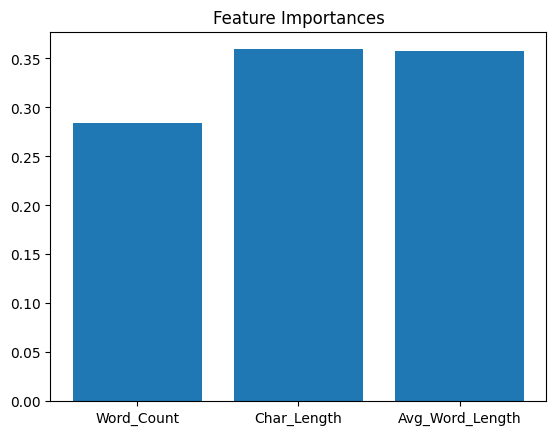

Updated Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.20      0.32       142
           1       0.82      0.99      0.90       535

    accuracy                           0.82       677
   macro avg       0.80      0.59      0.61       677
weighted avg       0.82      0.82      0.78       677

Updated Accuracy Score: 0.8212703101920237


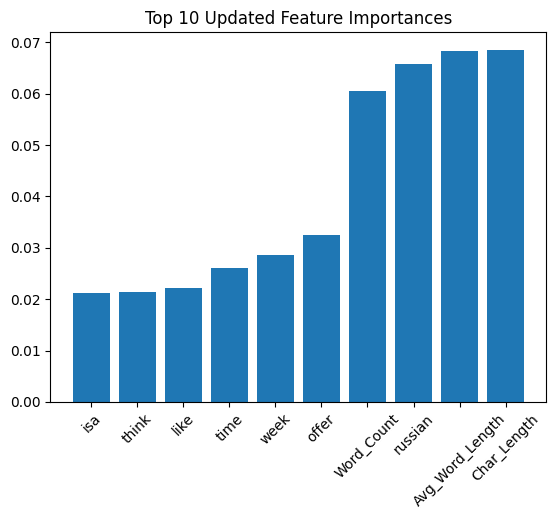

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer

# Load the CSV data
data = pd.read_csv('df.csv')

# First look at the data
print(data.head())

# Calculation of new features
# Word count of the message
data['Word_Count'] = data['Content'].apply(lambda x: len(str(x).split()))

# Character count of the message
data['Char_Length'] = data['Content'].apply(lambda x: len(str(x)))

# Average word length
data['Avg_Word_Length'] = data['Content'].apply(lambda x: np.mean([len(word) for word in str(x).split()]))

# Outcome column (target variable)
y = data['NegoOutcomeLabel']

# Features for the analysis
X = data[['Word_Count', 'Char_Length', 'Avg_Word_Length']]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Random Forest model to detect relationships
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predictions and evaluation
y_pred = rf.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))

# Feature Importance
importances = rf.feature_importances_
features = X.columns
plt.bar(features, importances)
plt.title('Feature Importances')
plt.show()

# Analysis of word content with CountVectorizer
vectorizer = CountVectorizer(stop_words='english', max_features=50)
X_vectorized = vectorizer.fit_transform(data['Content'].fillna('')).toarray()
feature_names = vectorizer.get_feature_names_out()

# Add the most frequent words as features
for idx, word in enumerate(feature_names):
    data[word] = X_vectorized[:, idx]

# Updated features for the second analysis
X_updated = data[['Word_Count', 'Char_Length', 'Avg_Word_Length'] + list(feature_names)]

# Split data into training and test sets again
X_train_updated, X_test_updated, y_train_updated, y_test_updated = train_test_split(X_updated, y, test_size=0.3, random_state=42)

# New model with extended features
rf_updated = RandomForestClassifier(random_state=42)
rf_updated.fit(X_train_updated, y_train_updated)

# New predictions and evaluation
y_pred_updated = rf_updated.predict(X_test_updated)
print("Updated Classification Report:")
print(classification_report(y_test_updated, y_pred_updated))
print("Updated Accuracy Score:", accuracy_score(y_test_updated, y_pred_updated))

# New feature importance visualization
updated_importances = rf_updated.feature_importances_
updated_features = X_updated.columns

# Display only the top 10 important features
sorted_indices = np.argsort(updated_importances)[-10:]
plt.bar(np.array(updated_features)[sorted_indices], updated_importances[sorted_indices])
plt.title('Top 10 Updated Feature Importances')
plt.xticks(rotation=45)
plt.show()


On First sight we thought that the word xount, the average word length or the charakter lenght had influence on the negotation outcome but we soon realizes as shown in the graphs that they are very much irrelevant. They hold a bigger feature importance that some words, but for one, they are still under 0.1 percent, and secondly, the word russian ist just as important, which means they hold no significance